In [8]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import math

## data stored to b
b = bagreader('stationary_open.bag')
b2 = bagreader('walking_open.bag')
#shows a table of all topics with information of how many msgs in them
print(b.topic_table)

[INFO]  Data folder stationary_open already exists. Not creating.
[INFO]  Data folder walking_open already exists. Not creating.
  Topics               Types  Message Count  Frequency
0   /gps  gps_driver/gps_msg            601   0.999786


In [6]:
# saving to csv
st= b.message_by_topic(topic='/gps')
walker = b2.message_by_topic(topic='/gps')
stand = pd.read_csv(st)
walk = pd.read_csv(walker)
walk

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Quality,Letter
0,1.665434e+09,927,74025,0,GPS1_Frame,42.338651,-70.913684,32.9,4.689151e+06,342353.571530,19,4,T
1,1.665434e+09,928,74026,0,GPS1_Frame,42.338651,-70.913684,32.9,4.689151e+06,342353.557383,19,4,T
2,1.665434e+09,929,74027,0,GPS1_Frame,42.338648,-70.913687,32.8,4.689151e+06,342353.317306,19,4,T
3,1.665434e+09,930,74028,0,GPS1_Frame,42.338643,-70.913693,32.8,4.689150e+06,342352.797626,19,4,T
4,1.665434e+09,931,74029,0,GPS1_Frame,42.338639,-70.913700,32.8,4.689150e+06,342352.223441,19,4,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1.665434e+09,1013,74111,0,GPS1_Frame,42.338658,-70.913695,32.9,4.689152e+06,342352.655366,19,4,T
87,1.665434e+09,1014,74112,0,GPS1_Frame,42.338652,-70.913689,32.9,4.689151e+06,342353.177101,19,4,T
88,1.665434e+09,1015,74113,0,GPS1_Frame,42.338647,-70.913684,32.8,4.689150e+06,342353.562367,19,4,T
89,1.665434e+09,1016,74114,0,GPS1_Frame,42.338646,-70.913682,32.9,4.689150e+06,342353.682608,19,4,T


Stationary Data

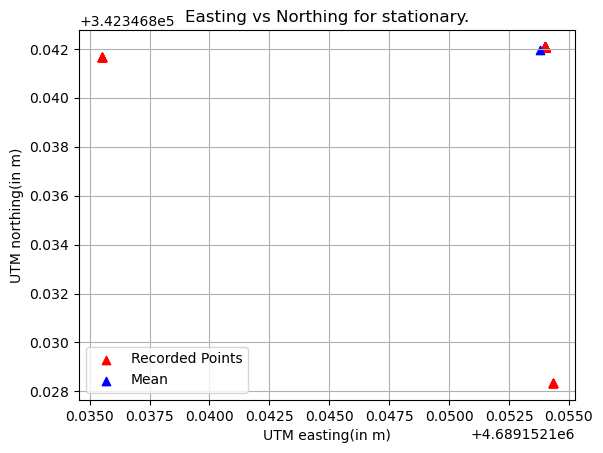

In [77]:
# plotting
plt.scatter(stand['UTM_easting'],stand['UTM_northing'], marker='^', color='r', label='Recorded Points')
plt.scatter(statistics.mean(stand['UTM_easting']),statistics.mean(stand['UTM_northing']), color='b', marker='^', label='Mean')
plt.ylabel('UTM northing(in m)')
plt.xlabel('UTM easting(in m)')
plt.title('Easting vs Northing for stationary.')
plt.grid()
plt.legend()
plt.show()


In [59]:
import statistics
m1 = statistics.mean(stand['UTM_northing'])
m2 = statistics.mean(stand['UTM_easting'])
print("Mean of UTM_Easting values gives", m1,"\n","Mean of UTM_Easting values gives",m2,"\n")

from sklearn.metrics import mean_squared_error
from math import sqrt
mn = stand['UTM_northing'].copy()
mn1=mn.copy()
mn[:] = m1
mse = mean_squared_error(mn, mn1)
mn2 = stand['UTM_easting'].copy()
mn3=mn2.copy()
mn2[:] = m2
mse2 = mean_squared_error(mn2, mn3)
print("MSE for utm_northing is", mse,"MSE for utm_easting is", mse2,"\n")
print("RMSE for utm_northing is", math.sqrt(mse),"RMSE for utm_easting is", math.sqrt(mse2))

Mean of UTM_Easting values gives 342346.8419585514 
 Mean of UTM_Easting values gives 4689152.153796171 

MSE for utm_northing is 1.5562202130834353e-06 MSE for utm_easting is 3.9446710003676914e-06 

RMSE for utm_northing is 0.0012474855562624504 RMSE for utm_easting is 0.001986119583602078


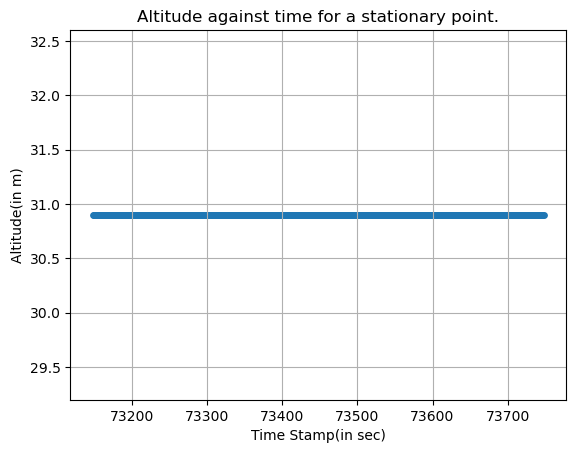

In [45]:
plt.scatter(stand['Header.stamp.secs'],stand['Altitude'], s=15)
plt.ylabel('Altitude(in m)')
plt.xlabel('Time Stamp(in sec)')
plt.title('Altitude against time for a stationary point.')
plt.grid()

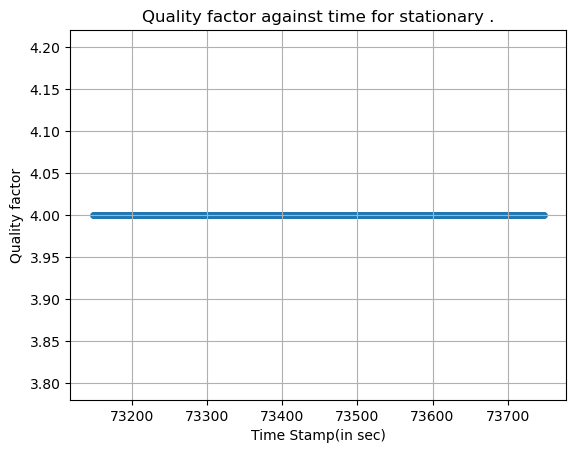

In [47]:
plt.scatter(stand['Header.stamp.secs'],stand['Quality'], s=15)
plt.ylabel('Quality factor')
plt.xlabel('Time Stamp(in sec)')
plt.title('Quality factor against time for stationary .')
plt.grid()

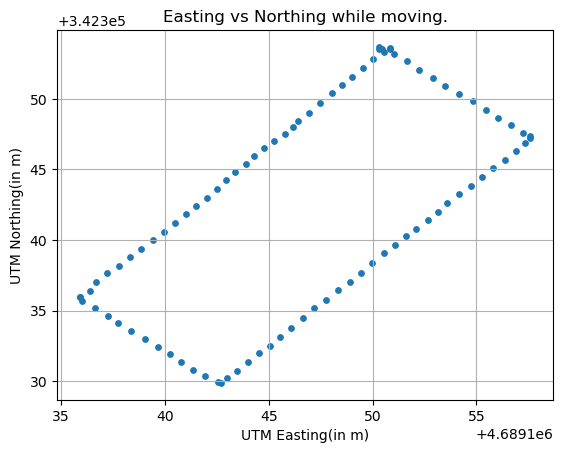

In [48]:
# plotting
plt.scatter(walk['UTM_easting'],walk['UTM_northing'], s=15)
plt.ylabel('UTM Northing(in m)')
plt.xlabel('UTM Easting(in m)')
plt.title('Easting vs Northing while moving.')
plt.grid()

Plotting lines of travel for error estimation (assuming that the actual path was traversed in a straight line)

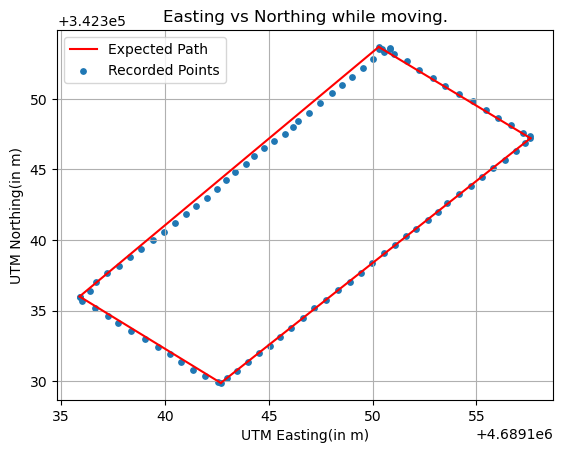

In [1]:
def distError(c1, c2, slicedDf):
    
    errList=[]
    
    for _, row in slicedDf.iterrows():
        x, y = row["UTM_easting"], row["UTM_northing"]

        p1 = np.array([c1["UTM_easting"], c1["UTM_northing"]])
        p2 = np.array([c2["UTM_easting"], c2["UTM_northing"]])
        p3 = np.array([x, y])

        d = np.abs(np.cross(p2-p1, p3-p1))/norm(p2-p1)
        errList.append(d)       
        
    return errList

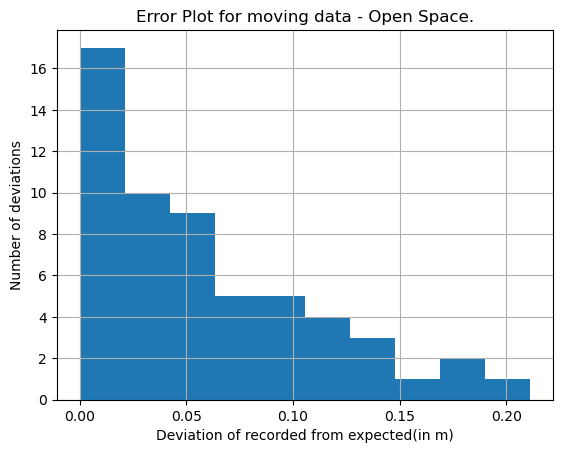

In [39]:
from numpy.linalg import norm
# 1st corner
c1 = walk.iloc[walk["UTM_easting"].idxmin(),:]

# 2nd corner of the loop
c2 = walk.iloc[walk["UTM_northing"].idxmin(),:]

# 3rd corner
c3 = walk.iloc[walk["UTM_easting"].idxmax(), :]

# 4th corner
c4 = walk.iloc[walk["UTM_northing"].idxmax(), :]

start1 = min(walk["UTM_easting"].idxmin(), walk["UTM_northing"].idxmin())
end1 = max(walk["UTM_easting"].idxmin(), walk["UTM_northing"].idxmin())

start2 = min(walk["UTM_northing"].idxmin(), walk["UTM_easting"].idxmax())
end2 = max(walk["UTM_northing"].idxmin(), walk["UTM_easting"].idxmax())

start3 = min(walk["UTM_easting"].idxmax(), walk["UTM_northing"].idxmax())
end3 = max(walk["UTM_easting"].idxmax(), walk["UTM_northing"].idxmax())

start4 = min(walk["UTM_northing"].idxmax(), walk["UTM_easting"].idxmin())
end4 = max(walk["UTM_northing"].idxmax(), walk["UTM_easting"].idxmin())

slicedDf_1 = walk.iloc[start1:end1, :]
slicedDf_2 = walk.iloc[start2:end2, :]
slicedDf_3 = walk.iloc[start3:end3, :]
slicedDf_4 = walk.iloc[start4:end4, :]

errList1 = distError(c1, c2, slicedDf_1)
errList2 = distError(c2, c3, slicedDf_2)
errList3 = distError(c3, c4, slicedDf_3)
errList4 = distError(c4, c1, slicedDf_4)

## The errors calculated for the fourth edge seems to have come out wrong with values of upto ( 9 m ) which cannot be seen in the graph. 
# Hence, it has not been considered in the histogram plot for the report.

errListTotal = errList1 + errList2 + errList3
plt.hist(errListTotal)
plt.ylabel('Number of deviations')
plt.xlabel('Deviation of recorded from expected(in m)')
plt.title('Error Plot for moving data - Open Space.')
plt.grid()


In [64]:
## Calculation for mse and rmse for moving data

errListTotal = errList1 + errList2 + errList3
se = []
for err in errListTotal:
    se.append(err**2)
mse = statistics.mean(se)
rmse = math.sqrt(mse)
print("Mean Squared error is ", mse, " and rmse is", rmse)

Mean Squared error is  0.0060812859896697165  and rmse is 0.07798260055723787


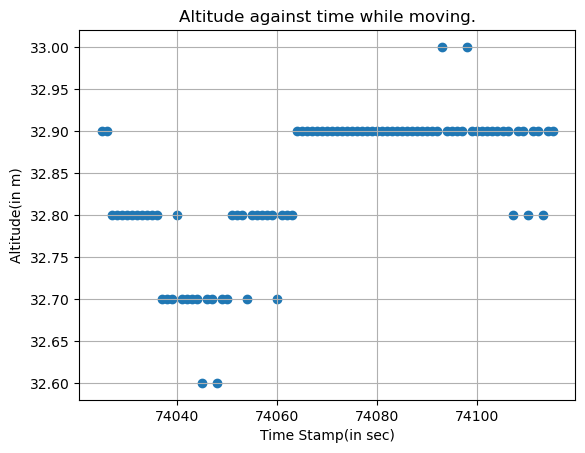

In [36]:
#Altitude for the moving data in open space

plt.scatter(walk['Header.stamp.secs'],walk['Altitude'])
plt.ylabel('Altitude(in m)')
plt.xlabel('Time Stamp(in sec)')
plt.title('Altitude against time while moving.')
plt.grid()

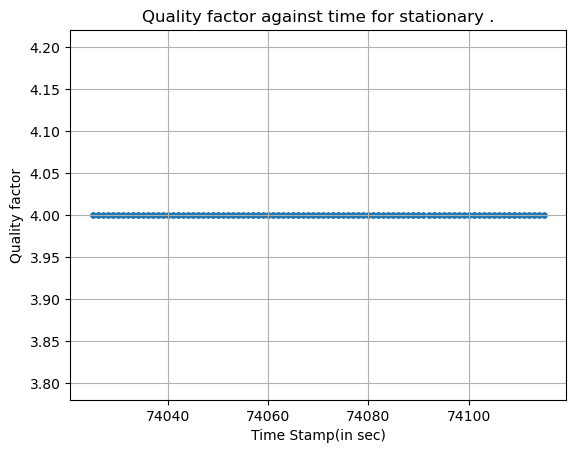

In [50]:
plt.scatter(walk['Header.stamp.secs'],walk['Quality'], s=15)
plt.ylabel('Quality factor')
plt.xlabel('Time Stamp(in sec)')
plt.title('Quality factor against time for stationary .')
plt.grid() 